## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
lab_stu_mdf = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')


# Display the data table for preview
lab_stu_mdf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
print(lab_stu_mdf.nunique())
lab_stu_mdf["Mouse ID"].count()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64


1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#lab_stu_dup = lab_stu_df
lab_stu_mdf[lab_stu_mdf.duplicated(subset=['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
lab_stu_mdf.loc[lab_stu_mdf['Mouse ID'] =='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#lab_stu_df = lab_stu_mdf.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
lab_stu_df = lab_stu_mdf.loc[lab_stu_mdf['Mouse ID'] !='g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
print(lab_stu_df.nunique())
lab_stu_df["Mouse ID"].count()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64


1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_summ = lab_stu_mdf.loc[ : , ["Drug Regimen", "Tumor Volume (mm3)"]]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
stat_summ = stat_summ.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
stat_summ.agg(['mean', 'median', 'var', 'std', "sem"])


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
lab_stu_mdf.loc[ : , ["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").agg(['mean', 'median', 'var', 'std', "sem"])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Timepoints Recorded'>

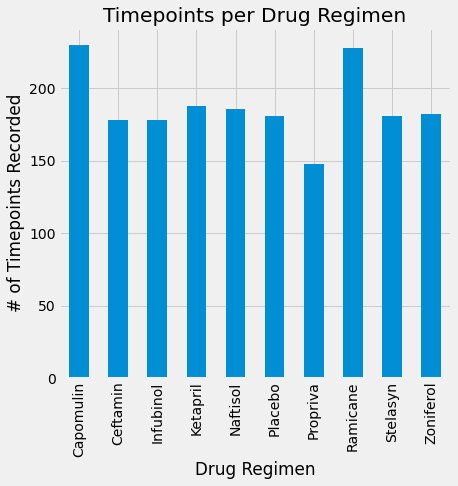

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plt.style.use("fivethirtyeight")
lab_bar_cut = lab_stu_df.groupby(["Drug Regimen"]).count()["Timepoint"]
#x_axis = np.arange(len(lab_bar_cut))
#tick_locations = [value for value in x_axis]
#timep_y = lab_stu_df.loc[ : , ['Mouse ID', 'Timepoint']].groupby("Mouse ID").count()
#mice_xb = lab_stu_df.loc[ : , ["Mouse ID"]].drop_duplicates()
#plt.ylim(-0.75, len(lab_bar_cut)-0.25)
#plt.figure(figsize=(10,50))
plt.tight_layout()
plt.title("Timepoints per Drug Regimen")
plt.ylabel("# of Timepoints Recorded")
lab_bar_cut.plot.bar(figsize=(6.25,6))
#lab_bar_cut

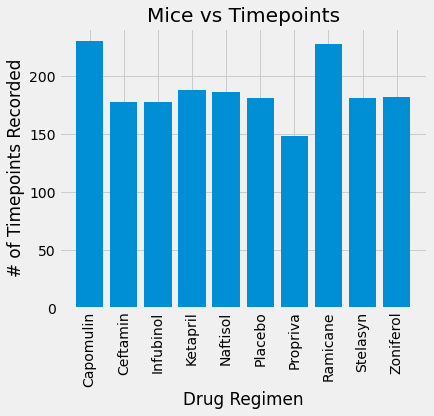

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# x_axis = np.arange(len(lab_stu_mdf))
mice_x = lab_stu_df.loc[ : , ["Drug Regimen"]].sort_values(by=["Drug Regimen"], ascending=True).drop_duplicates()
timep_y = lab_stu_df.loc[ : , ["Drug Regimen", 'Timepoint']].groupby("Drug Regimen").count()

plt.figure(figsize=(6.25,6))
x_axis = np.arange(len(mice_x))
#tick_lo = [value+0.4 for value in x_axis]


plt.bar(mice_x["Drug Regimen"],timep_y["Timepoint"])

plt.title("Mice vs Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Timepoints Recorded")
plt.xticks(rotation=90)
plt.tight_layout()

Text(0, 0.5, 'Gender of Test Mice')

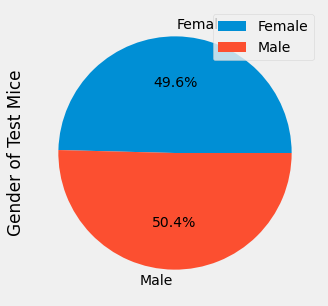

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
lab_pie_cut = lab_stu_df.loc[ : , ["Mouse ID", "Sex"]].drop_duplicates()
lab_pie_cut = lab_pie_cut.groupby("Sex").count()

lab_pie_cut.plot.pie(subplots=True, figsize=(5, 5),autopct='%1.1f%%')
plt.ylabel("Gender of Test Mice")

Text(0, 0.5, 'Gender of Test Mice')

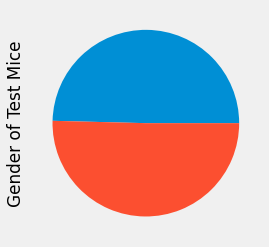

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(lab_pie_cut["Mouse ID"])
plt.ylabel("Gender of Test Mice")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_max_time = lab_stu_df.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_merg = pd.merge(mouse_max_time,lab_stu_df, on=["Mouse ID", "Timepoint"], how="left")
mouse_four_tr = mouse_merg.loc[mouse_merg['Drug Regimen'].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
mouse_four_tr

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = pd.Series(["Capomulin","Ramicane","Infubinol","Ceftamin"])

# Create empty list to fill with tumor vol data (for plotting)
tum_v_drug = pd.Series(dtype="float32")

#for loop to pull for each treatment
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
for k in drugs:
    loop_filt = mouse_four_tr.loc[mouse_four_tr['Drug Regimen'] == k]
    exec(f"{k}_tum_vol = loop_filt['Tumor Volume (mm3)'].tolist()")
    exec(f"{k}_q3,{k}_q2,{k}_q1 = np.percentile({k}_tum_vol, [75,50,25])")
    exec(f"{k}_iqr = {k}_q3 - {k}_q1")
    exec(f"{k}_upper = {k}_q3 + (1.5 * {k}_iqr)")
    exec(f"{k}_lower = {k}_q1 - (1.5 * {k}_iqr)")
    exec(f"print('The interquartile range of {k}:')")
    exec(f"print({k}_iqr), 2")
    exec(f"print('The upper quartile of {k} is')")
    exec(f"print({k}_q3)")
    exec(f"print('The lower quartile of {k} is:')")
    exec(f"print({k}_q1)")
    exec(f"print('The the median of {k} is:')")
    exec(f"print({k}_q2)")
    exec(f"print('{k} Upper outliers could be above:')")
    exec(f"print({k}_upper)")
    exec(f"print('{k} Lower outliers could be below:')")
    exec(f"print({k}_lower)")
    exec(f"print('{k} Data Set')")
    exec(f"print({k}_tum_vol)")
    print("\n")

The interquartile range of Capomulin:
7.781863460000004
The upper quartile of Capomulin is
40.1592203
The lower quartile of Capomulin is:
32.37735684
The the median of Capomulin is:
38.1251644
Capomulin Upper outliers could be above:
51.83201549
Capomulin Lower outliers could be below:
20.70456164999999
Capomulin Data Set
[38.98287774, 38.93963263, 30.48598484, 37.07402422, 40.1592203, 47.68596303, 37.31184577, 38.1251644, 38.75326548, 41.48300765, 38.84687569, 28.43096411, 33.32909778, 46.53920617, 32.37735684, 41.58152074, 23.34359787, 40.72857787, 34.45529799, 31.02392294, 40.65812366, 39.95234669, 36.04104736, 28.48403281, 31.8962384]


The interquartile range of Ramicane:
9.098536719999998
The upper quartile of Ramicane is
40.65900627
The lower quartile of Ramicane is:
31.56046955
The the median of Ramicane is:
36.56165229
Ramicane Upper outliers could be above:
54.30681135
Ramicane Lower outliers could be below:
17.912664470000003
Ramicane Data Set
[38.4076183, 43.0475426, 38.810

In [15]:
# Determine outliers using upper and lower bounds
#print(Capomulin_tum_vol)
for c in Capomulin_tum_vol:
    Capomulin_outliers = []
    if (c < Capomulin_lower) | (c > Capomulin_upper):
        Capomulin_outliers.append(c)
print(f"Capomulin outliers are: {Capomulin_outliers}")
#print(Ramicane_tum_vol)
for r in Ramicane_tum_vol:
    Ramicane_outliers = []
    if (r < Ramicane_lower) | (r > Ramicane_upper):
        Ramicane_outliers.append(r)
print(f"Ramicane outliers are: {Ramicane_outliers}")
#print(Infubinol_tum_vol)
for i in Infubinol_tum_vol:
    Infubinol_outliers = []
    if (i < Infubinol_lower) | (i > Infubinol_upper):
        Infubinol_outliers.append(i)
print(f"Infubinol outliers are: {Infubinol_outliers}")
#print(Ceftamin_tum_vol)
for ce in Ceftamin_tum_vol:
    Ceftamin_outliers = []
    if (ce < Ceftamin_lower) | (ce > Ceftamin_upper):
        Ceftamin_outliers.append(ce)
print(f"Ceftamin outliers are: {Ceftamin_outliers}")



Capomulin outliers are: []
Ramicane outliers are: []
Infubinol outliers are: []
Ceftamin outliers are: []


<function matplotlib.pyplot.show(close=None, block=None)>

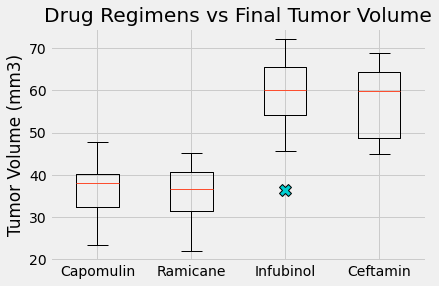

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# four_regimens = pd.DataFrame([[Capomulin_tum_vol,Ramicane_tum_vol,Infubinol_tum_vol,Ceftamin_tum_vol]],
#     columns=["Capomulin","Ramicane","Infubinol","Ceftamin"])
    
# four_regimens
fig1, ax1 = plt.subplots()
ax1.set_title("Drug Regimens vs Final Tumor Volume")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot([Capomulin_tum_vol,Ramicane_tum_vol,Infubinol_tum_vol,Ceftamin_tum_vol], 
            labels=["Capomulin","Ramicane","Infubinol","Ceftamin"], 
            flierprops={'marker': 'X', 'markersize': 12, 'markerfacecolor': '#00CED1'})
plt.show

## Line and Scatter Plots

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   

    Tumor Volume (mm3)  Metastatic Sites  
10                45.0                 0  


<function matplotlib.pyplot.show(close=None, block=None)>

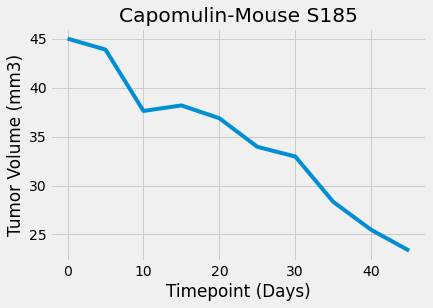

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo = lab_stu_df.loc[lab_stu_df['Drug Regimen'] == "Capomulin"]
print(capo.head(1))
s185 = lab_stu_df.loc[lab_stu_df['Mouse ID'] == "s185"]
plt.plot(s185["Timepoint"],s185["Tumor Volume (mm3)"])

plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin-Mouse S185")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

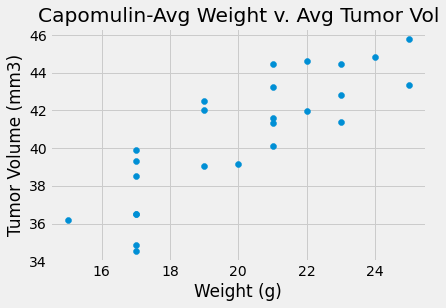

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_avg = capo.groupby("Mouse ID").mean()
plt.scatter(capo_avg["Weight (g)"],capo_avg["Tumor Volume (mm3)"])

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin-Avg Weight v. Avg Tumor Vol")

plt.show

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capo_cc = st.pearsonr(capo_avg["Weight (g)"],capo_avg["Tumor Volume (mm3)"])[0]
print(f"The correlation coefficient for the Capomulin regimen(mouse weight v. tumor vol) is: {round(capo_cc, 2)}")
#Linear Regression Calcs
cwt_slope, cwt_int, cwt_r, cwt_p, cwt_std_err = st.linregress(capo_avg["Weight (g)"],capo_avg["Tumor Volume (mm3)"])
cwt_line = cwt_slope * capo_avg["Weight (g)"] + cwt_int

The correlation coefficient for the Capomulin regimen(mouse weight v. tumor vol) is: 0.84


<function matplotlib.pyplot.show(close=None, block=None)>

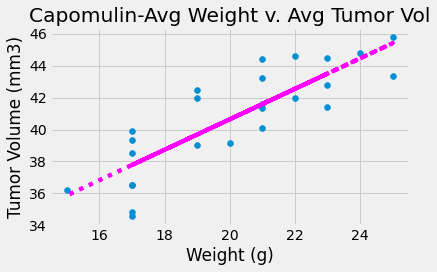

In [20]:
plt.scatter(capo_avg["Weight (g)"],capo_avg["Tumor Volume (mm3)"])
plt.plot(capo_avg["Weight (g)"],cwt_line,color='#FF00FF',linestyle=":")

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin-Avg Weight v. Avg Tumor Vol")
plt.tight_layout()

plt.show